In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [34]:
## Load the CSV file into a DataFrame
gdp_df = pd.read_csv("gdp_per_capita.csv")
print(gdp_df)



     Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2023  1992.424394              NaN
1        Afghanistan  2022  1981.710168              NaN
2        Afghanistan  2021  2144.166570              NaN
3        Afghanistan  2020  2769.685745              NaN
4        Afghanistan  2019  2927.245144              NaN
...              ...   ...          ...              ...
8214        Zimbabwe  1994  3965.730986              NaN
8215        Zimbabwe  1993  3634.750494              NaN
8216        Zimbabwe  1992  3649.891947              NaN
8217        Zimbabwe  1991  4126.405247              NaN
8218        Zimbabwe  1990  4013.299059              NaN

[8219 rows x 4 columns]


Q4: Inspect the last 10 rows

In [35]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
8209,Zimbabwe,1999,4238.195198,NaN
8210,Zimbabwe,1998,4342.858177,NaN
8211,Zimbabwe,1997,4304.406272,NaN
8212,Zimbabwe,1996,4271.479930,NaN
8213,Zimbabwe,1995,3935.280057,NaN
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


Q4: Inspect the first 10 rows

In [36]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
5,Afghanistan,2018,2902.392113,NaN
6,Afghanistan,2017,2952.998916,NaN
7,Afghanistan,2016,2958.785399,NaN
8,Afghanistan,2015,2967.692067,NaN
9,Afghanistan,2014,3017.942544,NaN


Q5: Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [37]:
gdp_df=gdp_df.drop(columns="Value Footnotes")
gdp_df=gdp_df.rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
print(gdp_df)


          Country  Year  GDP_Per_Capita
0     Afghanistan  2023     1992.424394
1     Afghanistan  2022     1981.710168
2     Afghanistan  2021     2144.166570
3     Afghanistan  2020     2769.685745
4     Afghanistan  2019     2927.245144
...           ...   ...             ...
8214     Zimbabwe  1994     3965.730986
8215     Zimbabwe  1993     3634.750494
8216     Zimbabwe  1992     3649.891947
8217     Zimbabwe  1991     4126.405247
8218     Zimbabwe  1990     4013.299059

[8219 rows x 3 columns]


Q6: How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.


In [38]:
num_rows, num_cols = gdp_df.shape
print(f"The DataFrame has {num_rows} rows and {num_cols} columns.")
print(gdp_df.dtypes)


The DataFrame has 8219 rows and 3 columns.
Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object


Q7: Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

Comment. I found that there is more than 200 observation for each year.

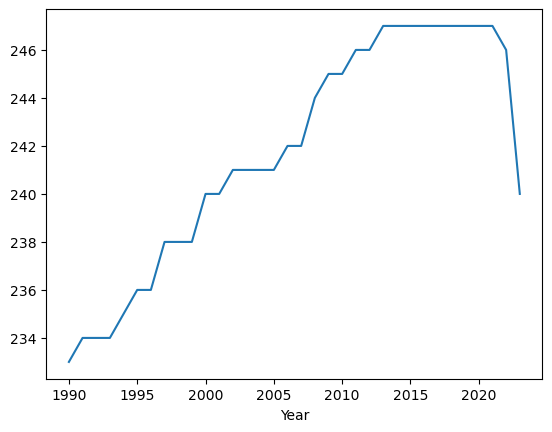

In [39]:
 gdp_df['Year'].value_counts().sort_index().plot();

Q8:How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?
Comment. I believe that their limited presence may be attributed to a poor economic status.

In [40]:
Country_counts = gdp_df['Country'].value_counts()
num_Countries = Country_counts.count()
print(num_Countries)

Country_counts = gdp_df['Country'].value_counts()
Countries_least_represented = Country_counts.nsmallest(5)
print(Countries_least_represented)




247
Country
Djibouti                     11
Turks and Caicos Islands     13
Sint Maarten (Dutch part)    15
Faroe Islands                16
Kosovo                       16
Name: count, dtype: int64


Q9: Create a new dataframe by subsetting gdp_df to just the year 2021. Call this new dataframe gdp_2021.



In [41]:
gdp_2021=gdp_df[gdp_df['Year']==2021]
print(gdp_2021)

                          Country  Year  GDP_Per_Capita
2                     Afghanistan  2021     2144.166570
26    Africa Eastern and Southern  2021     3934.287267
60     Africa Western and Central  2021     4698.926894
94                        Albania  2021    16113.136519
128                       Algeria  2021    14496.865470
...                           ...   ...             ...
8067               Virgin Islands  2021    46893.549699
8089           West Bank and Gaza  2021     5663.121607
8119                        World  2021    19637.823230
8153                       Zambia  2021     3503.034914
8187                     Zimbabwe  2021     3184.785451

[247 rows x 3 columns]


Q10: Use .describe() to find the summary statistics for GDP per capita in 2021.

In [42]:
summary_statistics = gdp_2021['GDP_Per_Capita'].describe()
print(summary_statistics)

count       247.000000
mean      24478.517262
std       24601.525764
min         836.665571
25%        5996.532844
50%       15900.976581
75%       37298.776853
max      135379.291201
Name: GDP_Per_Capita, dtype: float64


Q11: Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

Comment: The Histogram shows a non-uniform distribution of GDP_Per_Capita in 2021. Furthermore, it reveals that a very small percentage of countries are performing well economically, while the majority are under performing.

<function matplotlib.pyplot.show(close=None, block=None)>

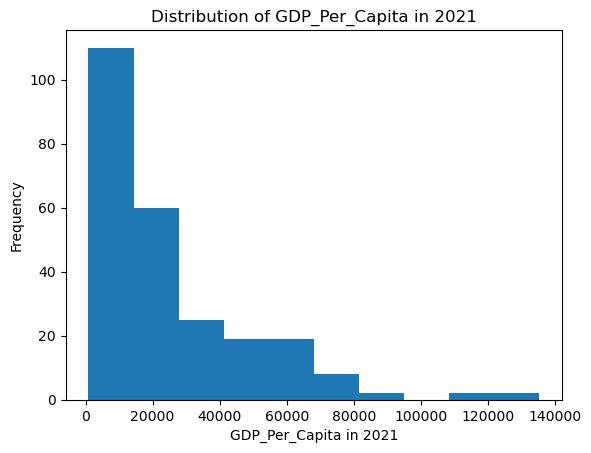

In [43]:
plt.hist(gdp_2021['GDP_Per_Capita'],bins=10)
plt.title('Distribution of GDP_Per_Capita in 2021')
plt.xlabel('GDP_Per_Capita in 2021')
plt.ylabel('Frequency')
plt.show

Q12: Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.

In [44]:

top_5_countries = gdp_2021.nlargest(5, 'GDP_Per_Capita')
print("Top 5 countries by GDP per capita in 2021:")
print(top_5_countries)

Top 5 countries by GDP per capita in 2021:
         Country  Year  GDP_Per_Capita
4425  Luxembourg  2021   135379.291201
6513   Singapore  2021   131864.092336
3492     Ireland  2021   118594.746862
6118       Qatar  2021   116832.570290
740      Bermuda  2021    92276.234605


Bottom 5 countris by GDP_Per_Capita in 2021

In [45]:
bottom_5_countries = gdp_2021.nsmallest(5, 'GDP_Per_Capita')
print(bottom_5_countries)

                       Country  Year  GDP_Per_Capita
1045                   Burundi  2021      836.665571
1301  Central African Republic  2021     1128.552380
1733           Dem. Rep. Congo  2021     1313.618218
6698                   Somalia  2021     1392.464262
5132                Mozambique  2021     1457.235409


Q13: Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2021 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted.

In [46]:
gdp_filtered = gdp_df[gdp_df['Year'].isin([1990, 2021])]
gdp_pivoted = pd.pivot_table(
    gdp_filtered,
    index='Country',
    columns='Year',
    values='GDP_Per_Capita',
    dropna=True)     
gdp_pivoted = gdp_pivoted.dropna()
print (gdp_pivoted)

Year                                 1990          2021
Country                                                
Africa Eastern and Southern   3386.854480   3934.287267
Africa Western and Central    3299.401375   4698.926894
Albania                       5327.747458  16113.136519
Algeria                      11728.545729  14496.865470
Andorra                      50036.300776  59332.202910
...                                   ...           ...
Vanuatu                       3101.680551   3135.836649
Viet Nam                      2467.964601  12048.901994
World                        11207.386344  19637.823230
Zambia                        2425.111287   3503.034914
Zimbabwe                      4013.299059   3184.785451

[233 rows x 2 columns]


Q14: Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [47]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2021] - gdp_pivoted[1990]) / gdp_pivoted[1990]
print(gdp_pivoted)

Year                                 1990          2021  Percent_Change
Country                                                                
Africa Eastern and Southern   3386.854480   3934.287267       16.163458
Africa Western and Central    3299.401375   4698.926894       42.417559
Albania                       5327.747458  16113.136519      202.438069
Algeria                      11728.545729  14496.865470       23.603265
Andorra                      50036.300776  59332.202910       18.578316
...                                   ...           ...             ...
Vanuatu                       3101.680551   3135.836649        1.101213
Viet Nam                      2467.964601  12048.901994      388.212108
World                        11207.386344  19637.823230       75.222149
Zambia                        2425.111287   3503.034914       44.448419
Zimbabwe                      4013.299059   3184.785451      -20.644203

[233 rows x 3 columns]


Q15: How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [48]:
negative_change_count = (gdp_pivoted['Percent_Change'] < 0).sum()
print(f'Number of countries with negative percent change in GDP per capita from 1990 to 2021: {negative_change_count}')

Number of countries with negative percent change in GDP per capita from 1990 to 2021: 23


Q16: Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

Country with HIGHEST % change: Equatorial Guinea
Country with SECOND HIGHEST % change: China


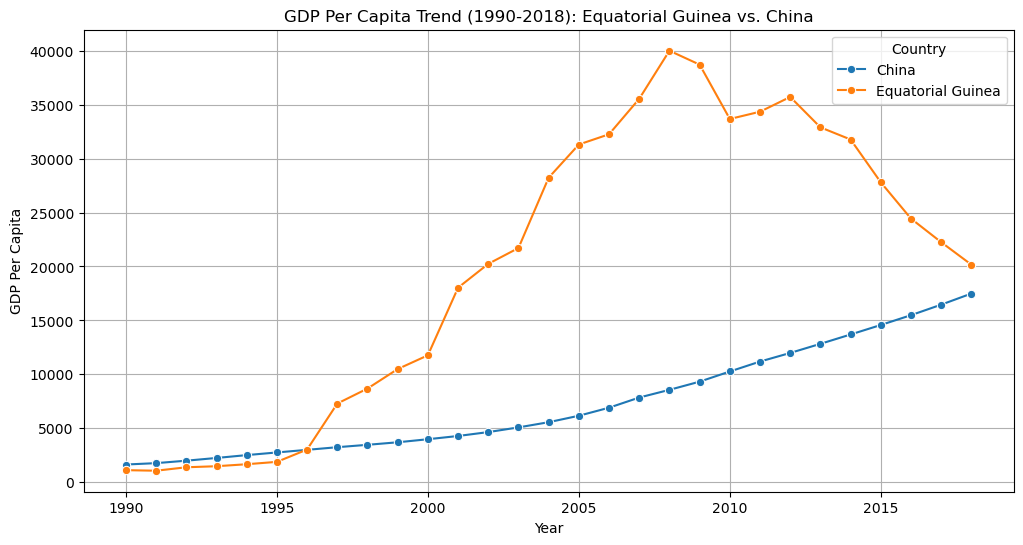

In [49]:
top_countries = gdp_pivoted.nlargest(2, 'Percent_Change')
top_1_country = top_countries.index[0]
top_2_country = top_countries.index[1]

print(f"Country with HIGHEST % change: {top_1_country}")
print(f"Country with SECOND HIGHEST % change: {top_2_country}")

countries_to_plot = [top_1_country, top_2_country]

gdp_plot_df = gdp_df[
    (gdp_df['Country'].isin(countries_to_plot)) &
    (gdp_df['Year'] >= 1990) &
    (gdp_df['Year'] <= 2018)
].copy()

plt.figure(figsize=(12, 6))

sns.lineplot(
    data=gdp_plot_df,
    x='Year',
    y='GDP_Per_Capita',
    hue='Country',   
    marker='o'
)

plt.title(f'GDP Per Capita Trend (1990-2018): {top_1_country} vs. {top_2_country}')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.grid(True)
plt.legend(title='Country')
plt.show()


Q17: Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [50]:
continents = pd.read_csv("continents.csv")
print(continents)


    Continent             Country
0        Asia         Afghanistan
1      Europe             Albania
2      Africa             Algeria
3      Europe             Andorra
4      Africa              Angola
..        ...                 ...
211      Asia             Vietnam
212      Asia  West Bank and Gaza
213      Asia               Yemen
214    Africa              Zambia
215    Africa            Zimbabwe

[216 rows x 2 columns]


Q18: Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.



In [51]:
gdp_df = pd.merge(
    gdp_df,
    continents,
    on='Country',
    how='inner'
)
print(gdp_df)

          Country  Year  GDP_Per_Capita Continent
0     Afghanistan  2023     1992.424394      Asia
1     Afghanistan  2022     1981.710168      Asia
2     Afghanistan  2021     2144.166570      Asia
3     Afghanistan  2020     2769.685745      Asia
4     Afghanistan  2019     2927.245144      Asia
...           ...   ...             ...       ...
6258     Zimbabwe  1994     3965.730986    Africa
6259     Zimbabwe  1993     3634.750494    Africa
6260     Zimbabwe  1992     3649.891947    Africa
6261     Zimbabwe  1991     4126.405247    Africa
6262     Zimbabwe  1990     4013.299059    Africa

[6263 rows x 4 columns]


Q19: Determine the number of countries per continent. Create a bar chart showing this.

Continent
Africa           50
Asia             41
Europe           45
North America    26
Oceania          14
South America    11
Name: count, dtype: int64


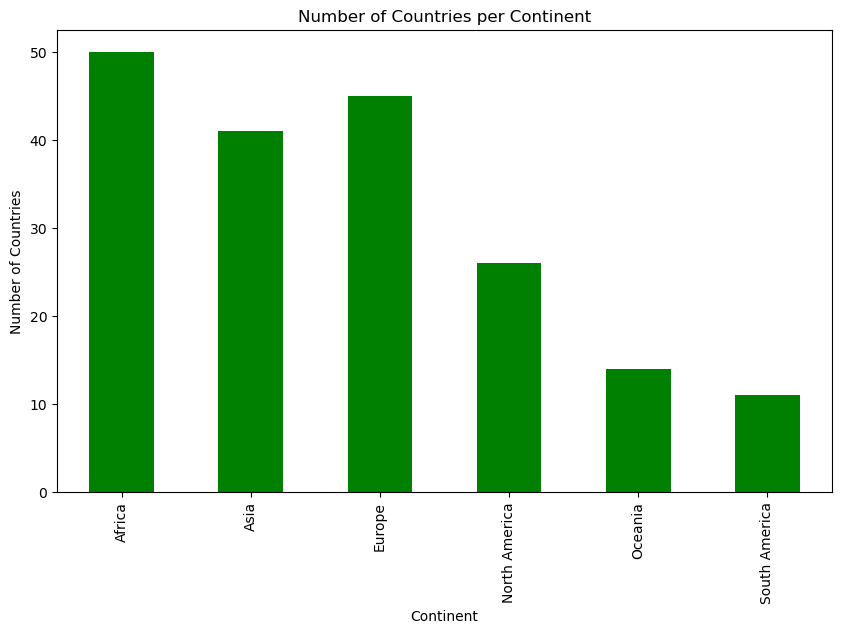

In [52]:
gdp_df_unique = gdp_df.drop_duplicates(subset=['Continent', 'Country'])
country_counts = gdp_df_unique['Continent'].value_counts().sort_index()
print(country_counts)
plt.figure(figsize=(10, 6))  
country_counts.plot(kind='bar', color='green')  
plt.title('Number of Countries per Continent')  
plt.xlabel('Continent')  
plt.ylabel('Number of Countries')    
plt.show()  

Q20: Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

      GDP_Per_Capita Continent
2        2144.166570      Asia
26      16113.136519    Europe
60      14496.865470    Africa
94      59332.202910    Europe
128      7408.126591    Africa
...              ...       ...
6099     9247.643827      Asia
6133     3135.836649   Oceania
6167     5663.121607      Asia
6197     3503.034914    Africa
6231     3184.785451    Africa

[187 rows x 2 columns]


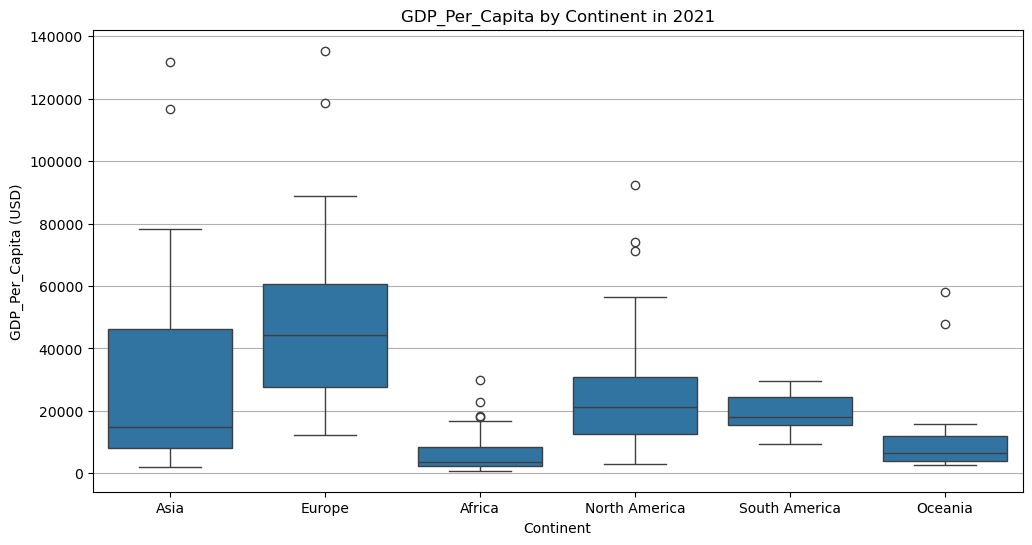

In [53]:
GDP_Per_Capita_Continent_2021 = gdp_df[gdp_df['Year'] == 2021][['GDP_Per_Capita', 'Continent']]
print(GDP_Per_Capita_Continent_2021)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Continent', y='GDP_Per_Capita', data=GDP_Per_Capita_Continent_2021)
plt.title('GDP_Per_Capita by Continent in 2021')
plt.xlabel('Continent')
plt.ylabel('GDP_Per_Capita (USD)')
plt.grid(axis='y')
plt.show()



Q21: Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. Read this data into a DataFrame named life_expectancy. Note: When reading this dataset it, you may encounter an error. Modify your read_csv call to correct this without modifying the original csv file.

In [54]:
life_expectancy = pd.read_csv('../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_22997.csv',skiprows=4)


Q22: Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.



In [55]:
life_expectancy_dropped = life_expectancy.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])
life_expectancy_melted = life_expectancy_dropped.melt(id_vars='Country Name', var_name='Year', value_name='Life_Expectancy')
life_expectancy_melted = life_expectancy_melted.rename(columns={'Country Name': 'Country', 'Year': 'Year', 'value': 'Life_Expectancy'})
print(life_expectancy_melted)


                           Country         Year  Life_Expectancy
0                            Aruba         1960        64.049000
1      Africa Eastern and Southern         1960        44.169658
2                      Afghanistan         1960        32.799000
3       Africa Western and Central         1960        37.779636
4                           Angola         1960        37.933000
...                            ...          ...              ...
17551                       Kosovo  Unnamed: 69              NaN
17552                  Yemen, Rep.  Unnamed: 69              NaN
17553                 South Africa  Unnamed: 69              NaN
17554                       Zambia  Unnamed: 69              NaN
17555                     Zimbabwe  Unnamed: 69              NaN

[17556 rows x 3 columns]


Q23: What was the first country with a life expectancy to exceed 80?

In [56]:
first_country = life_expectancy_melted.loc[life_expectancy_melted['Life_Expectancy'] > 80].iloc[0]['Country']
print(f"The first country with a life expectancy to exceed 80 was {first_country}.")


The first country with a life expectancy to exceed 80 was Monaco.


Q24: Merge gdp_df and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [57]:
life_expectancy_melted['Year'] =  pd.to_numeric(life_expectancy_melted['Year'], errors='coerce').astype('Int64')

In [59]:
gdp_le = pd.merge(gdp_df, 
                  life_expectancy_melted, 
                  on=['Country', 'Year'],
                  how='inner'
                  )
print(gdp_le)

          Country  Year  GDP_Per_Capita Continent  Life_Expectancy
0     Afghanistan  2023     1992.424394      Asia           66.035
1     Afghanistan  2022     1981.710168      Asia           65.617
2     Afghanistan  2021     2144.166570      Asia           60.417
3     Afghanistan  2020     2769.685745      Asia           61.454
4     Afghanistan  2019     2927.245144      Asia           62.941
...           ...   ...             ...       ...              ...
5851     Zimbabwe  1994     3965.730986    Africa           52.537
5852     Zimbabwe  1993     3634.750494    Africa           53.976
5853     Zimbabwe  1992     3649.891947    Africa           55.602
5854     Zimbabwe  1991     4126.405247    Africa           57.037
5855     Zimbabwe  1990     4013.299059    Africa           58.319

[5856 rows x 5 columns]


Q25: Create a new DataFrame, named gdp_le_2021 by extracting data for the year 2021 from gdp_le. How many countries have a life expectancy of at least 80 in 2021?

In [60]:
gdp_le_2021 = gdp_le[gdp_le['Year']==2021]
gdp_le_2021_least = gdp_le[gdp_le['Life_Expectancy']>=80] 
country_countts_2021= gdp_le_2021_least['Country'].value_counts()
print(country_countts_2021)

Country
Andorra                 30
Japan                   28
Hong Kong SAR, China    27
San Marino              24
Macao SAR, China        24
Iceland                 23
Switzerland             23
Italy                   22
Australia               21
Sweden                  21
Israel                  20
France                  20
Norway                  19
United Arab Emirates    19
Spain                   19
Canada                  19
Singapore               18
New Zealand             18
Austria                 17
Netherlands             17
Ireland                 16
Luxembourg              16
Belgium                 15
United Kingdom          15
Malta                   15
Cyprus                  15
Greece                  15
Finland                 13
Germany                 13
Portugal                13
Qatar                   12
Denmark                 12
Slovenia                12
Bermuda                 11
Bahrain                  8
Costa Rica               6
Chile               

Q26: Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

         Country  Year  GDP_Per_Capita Continent  Life_Expectancy
3061  Luxembourg  2021   135379.291201    Europe        82.597561
4673   Singapore  2021   131864.092336      Asia        83.092683
2434     Ireland  2021   118594.746862    Europe        82.253659


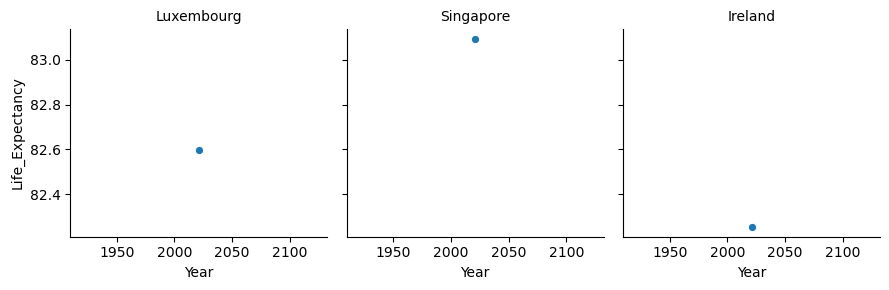

In [61]:
top_3_countries = gdp_le_2021.nlargest(3, 'GDP_Per_Capita')
print(top_3_countries)

g= sns.FacetGrid(top_3_countries, col='Country')
g.map(sns.lineplot, 'Year', 'Life_Expectancy', marker='o')
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Year", "Life_Expectancy")
plt.show()

Q27: Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

Comment: There is a positive correlation between GDP per capita and life expectancy; as GDP per capita rises, life expectancy tends to increase as well.



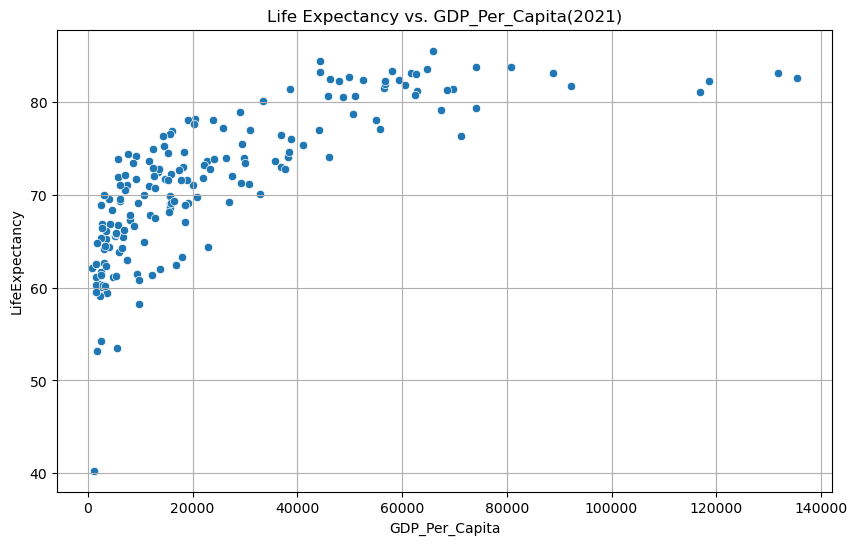

In [62]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=gdp_le_2021, x='GDP_Per_Capita', y='Life_Expectancy')
plt.title('Life Expectancy vs. GDP_Per_Capita(2021)')
plt.xlabel('GDP_Per_Capita')
plt.ylabel('LifeExpectancy')
plt.grid(True)
plt.show()

Q28: Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

Comment: A correlation of 0.75 suggests that as GDP per Capita increases, Life Expectancy tends to increase as well. This implies that wealthier economies, which have a higher GDP per Capita, often provide better living conditions including healthcare, and resources that contribute to longer life spans.

In [63]:
correlation = gdp_le_2021['Life_Expectancy'].corr(gdp_le_2021['GDP_Per_Capita'])
print(f"The correlation between Life Expectancy and GDP per Capita for the year 2021 is: {correlation}")

The correlation between Life Expectancy and GDP per Capita for the year 2021 is: 0.7527849922684223


Q29: Add a column to gdp_le_2021 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

Comment: In this analysis, I found a linear correlation between life expectancy and the logarithm of GDP per capita, which supports the earlier findings that indicate a positive relationship between increased GDP per capita and life expectancy.

The correlation between Life Expectancy and Log of GDP per Capita for the year 2021 is: 0.8490647859471865


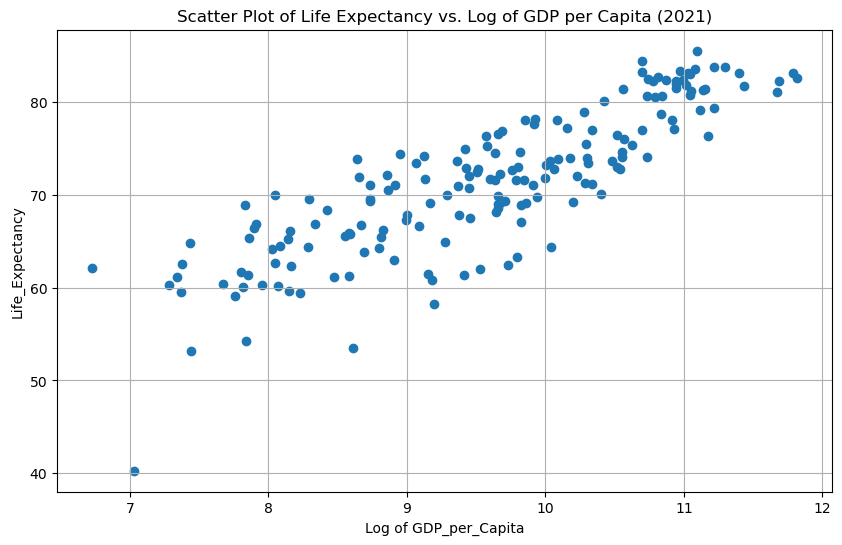

In [65]:
gdp_le_2021.loc[:, 'Log_GDP_Per_Capita'] = np.log(gdp_le_2021['GDP_Per_Capita'])
correlation_log = gdp_le_2021['Life_Expectancy'].corr(gdp_le_2021['Log_GDP_Per_Capita'])
print(f"The correlation between Life Expectancy and Log of GDP per Capita for the year 2021 is: {correlation_log}")

plt.figure(figsize=(10, 6))
plt.scatter(gdp_le_2021['Log_GDP_Per_Capita'], gdp_le_2021['Life_Expectancy'])
plt.title('Scatter Plot of Life Expectancy vs. Log of GDP per Capita (2021)')
plt.xlabel('Log of GDP_per_Capita')
plt.ylabel('Life_Expectancy')
plt.grid(True)
plt.show()
